# Analizando mi estantería



Una de mis mayores pasiones es leer. Desde bien pequeño he devorado libros, primero los de que había en casa de mis padres y luego libros que he ido comprando o recogiendo de la calle. Como todo apasionado de la literatura, tengo una relación cercada a la amistado con muchos de mis libros; las historias que me han regalado forman parte de mis recuerdos y mi personalidad. Tanto quiero a mis libros, que me gustaría poder tener siempre cerca de mí, para volver a ellos al menor arrebato. El problema es que nunca he vivido más de un año en la misma casa y esa provisionalidad me ha impedido acumular todos mis libros en un mismo sitio. 

Ahora que vivo solo en mi ciudad natal, Badajoz, he tenido la oportunidad de recoger los libros que tenía en casa de mis padres y ponerlos todos juntos por primera vez. En honor a la verdad, tengo que decir que aún me quedan muchos libros por reunir, porque mi casa es pequeña y me faltan estantería. En cualquier caso, no podía estar más feliz de tener por primera ves reunidos a una colección considerable de mis queridos compañeros de viaje.

Agrupar mis libros por primera vez me ha permitido poner en marcha un proyecto que llevaba tiempo pensando empredner: realizar un registro bibliográfico de mis libros.

Con este proyecto no solo pretendo poner en práctica algunas de las funcionalidades de Python que hemos aprendido en anteriores sesiones. También es una excusa para hablar de literatura, para descubrir mis preferencias y sesgos y, ya de paso,  animaros a leer. Espero que lo disrfrutéis.

<center><img src='https://github.com/jcanalesluna/courses_materials/blob/master/images/libreria.png?raw=true' width="500"></center>


## 1. cargando las librerías

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()
%matplotlib inline 


## 2. Cargando las bases de datos
Podéis encontrar los archivos csv en mi cuenta de GitHub. Se trata de dos bases de datos, una con información de los libros y otra con información de sus autores.

In [305]:
autores = pd.read_csv('https://raw.githubusercontent.com/jcanalesluna/courses_materials/master/datasets/authors.csv',sep=';')
libros = pd.read_csv('https://raw.githubusercontent.com/jcanalesluna/courses_materials/master/datasets/books.csv',sep=';')


## 3. Limpieza de datos


Siempre es buena práctica iniciar nuestro análisis echando un vistazo a nuestras bases de datos, por si pudiera haber errores.

Comenzamos el análisis en base de datos de libros

### 3.1. Libros

Comenzamos usando el método `.head()`para echar un primer vistazo a la base de datos

In [306]:
libros.head()

,title,author_name,author_surname,publisher,first_published,genre,pages,color,languaje,read,score
0,El hombre que amaba a los perros,Leonardo,Padura,Tusquets,2009,novel,765,black,spanish,False,NaN
1,Nombre falso,Ricardo,Piglia,Debolsillo,2014,short stories,181,black,spanish,True,6.0
2,Rayuela,Julio,Cortázar,Ediciones Cátedra,1963,novel,746,black,spanish,True,8.0
3,Una historia de amor y oscuridad,Amos,Oz,Debolsillo,2002,biography,775,gray,spanish,True,9.0
4,Azaña. Los que le llambamos don manuel,Josefina,Carabias,Seix Barral,1980,biography,372,white,spanish,False,NaN


In [307]:
# Podemos usar .tail() para ver el final de la tabla
libros.tail()

,title,author_name,author_surname,publisher,first_published,genre,pages,color,languaje,read,score
95,Lord Jim,Joseph,Conrad,Alianza Editorial,1900,novel,587,black,spanish,False,NaN
96,El corazón de las tieblas,Joseph,Conrad,Sexto Piso,1899,novel,128,purple,spanish,True,7.0
97,El adversario. Una novela rusa. De vidas ajenas,Emmanuel,Carrère,Anagrama,2017,novel,570,orange,spanish,True,6.0
98,The sense of an ending,Julian,Barnes,Vintage,2011,novel,150,gray,english,True,8.0
99,La guerra no tiene rostro de mujer,Svetlana,Alexiévich,Debate,2013,novel,365,orange,spanish,True,8.0


Una buena forma de empezar nuestro análisis es con los métodos `info()` y `describe()`

In [308]:
libros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            100 non-null    object 
 1   author_name      99 non-null     object 
 2   author_surname   98 non-null     object 
 3   publisher        100 non-null    object 
 4   first_published  100 non-null    int64  
 5   genre            100 non-null    object 
 6   pages            100 non-null    int64  
 7   color            100 non-null    object 
 8   languaje         100 non-null    object 
 9   read             100 non-null    bool   
 10  score            65 non-null     float64
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 8.0+ KB


En total, la base se compone de 100 filas (libros) y 11 columnas, representando diferente información sobre los libros:
+ title: Título de la obra 
+ author_name: Nombre del autor
+ author_surname: Apellido del autor
+ publisher: Editorial
+ first_published: Año de primera publicación de la obra
+ genre: Género de la obra
+ pages: Número de páginas
+ color: Color de la portada
+ languaje: idioma del libro
+ read: Si he leído el libro o no
+ score: Mi valoración personal (del 1 al 10)

In [309]:
# describe() sólo analiza variables numéricas. 
libros.describe()

,first_published,pages,score
count,100.000000,100.000000,65.000000
mean,1963.830000,388.760000,7.461538
std,136.974159,287.503153,1.146693
min,1605.000000,90.000000,4.000000
25%,1930.750000,187.000000,7.000000
50%,1984.000000,306.000000,7.000000
75%,2011.000000,536.250000,8.000000
max,3016.000000,2015.000000,10.000000


Debería llamarnos la atención una cosa: **Hay valores nulos**. Vamos a comprobar qué pasa en las columnas donde existen estos valores:

El caso más llamativo es el de la columna score, donde tenemos 34 valores nulos. Tiene sentido: son libros que no he leido. 

In [310]:
libros[libros.score.isnull()]

,title,author_name,author_surname,publisher,first_published,genre,pages,color,languaje,read,score
0,El hombre que amaba a los perros,Leonardo,Padura,Tusquets,2009,novel,765,black,spanish,False,NaN
4,Azaña. Los que le llambamos don manuel,Josefina,Carabias,Seix Barral,1980,biography,372,white,spanish,False,NaN
5,El impostor,Javier,Cercas,Literatura Random House,2014,novel,425,gray,spanish,False,NaN
7,Don Quijote de la Mancha (Segunda Parte),Miguel,de Cervantes,Planeta,1605,novel,562,brown,spanish,False,NaN
10,1Q84,Haruki,Murakami,Tusquets,2011,short stories,737,black,spanish,False,NaN
11,La vida instrucciones de uso,Georges,Perec,Anagrama,1978,novel,634,red,spanish,False,NaN
14,Episodios nacionales (Primera Parte). La Guerr...,Benito,Pérez Galdós,Destino,1873,novel,1457,blue,spanish,False,NaN
16,La madre Naturaleza,Emilia,Pardo Bazán,Ediciones Cátedra,1887,novel,405,black,spanish,False,NaN
17,El jinete polaco,Antonio,Muñoz Molina,Seix Barral,1991,novel,605,red,spanish,False,NaN
20,Así empieza lo malo,Javier,Marías,Alfaguara,2014,novel,533,blue,spanish,False,NaN


Los valores NaN se conrresponden con valores False en la columna "read". Vamos a comprobarlo para salir de dudas.

In [311]:
libros[(libros.score.isnull()) & (libros.read==True)]

,title,author_name,author_surname,publisher,first_published,genre,pages,color,languaje,read,score


El seguiente caso de valores nulos es la Constitución Española, que no tiene autor. Pude haber puesto a todos los [padres de la Constitución](https://es.wikipedia.org/wiki/Padres_de_la_Constituci%C3%B3n),  pero hubiera sido mucho lío. Preferí no poner nombres. Lo dejamos así


<center><img src='https://okdiario.com/img/2019/12/06/dia-de-la-constitucion-2019_--quienes-son-los-padres-de-la-constitucion-espanola.jpg' width="600"></center>



In [312]:
libros[libros.author_name.isnull()]

,title,author_name,author_surname,publisher,first_published,genre,pages,color,languaje,read,score
48,Constitución Española,NaN,NaN,Civitas,1978,legislation,141,red,spanish,True,7.0


Tenemos también el caso de Voltaire, que escribiío este magnífico diccionario filosófico que no he tenido el placer de leer aún. En verdad, tal como dice [Wikipedia](https://en.wikipedia.org/wiki/Voltaire#:~:text=Nicknamed%20%22Zozo%22%20by%20his%20family,mother's%20cousin%2C%20standing%20as%20godparents), Voltaire es un apodo que recibió un tipo llamado François-Marie Arouet. Quizá tenga más sentido poner su nombre real.
<center><img src='https://upload.wikimedia.org/wikipedia/commons/f/f2/Atelier_de_Nicolas_de_Largilli%C3%A8re%2C_portrait_de_Voltaire%2C_d%C3%A9tail_%28mus%C3%A9e_Carnavalet%29_-002.jpg' width="300"></center>



In [313]:
libros[libros.author_surname.isnull()]

,title,author_name,author_surname,publisher,first_published,genre,pages,color,languaje,read,score
48,Constitución Española,NaN,NaN,Civitas,1978,legislation,141,red,spanish,True,7.0
68,Diccionario filosfico,Voltaire,NaN,Akal,1764,dictionary,509,green,spanish,False,NaN


#### Ejercicio
+ Modifica el campo de nombre Voltaire para poner su verdadero nombre y apellido


In [314]:
libros.at[68, 'author_name'] = 'François-Marie'
libros.at[68, 'author_surname'] = 'Arouet'

In [315]:
libros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            100 non-null    object 
 1   author_name      99 non-null     object 
 2   author_surname   99 non-null     object 
 3   publisher        100 non-null    object 
 4   first_published  100 non-null    int64  
 5   genre            100 non-null    object 
 6   pages            100 non-null    int64  
 7   color            100 non-null    object 
 8   languaje         100 non-null    object 
 9   read             100 non-null    bool   
 10  score            65 non-null     float64
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 8.0+ KB


### 3.2. Autores

La segunda base de datos contiene información sobre los autores de las novelas de mi libería. En este caso, la base tiene 76 filas y 7 columnas:

+ name: Nombre del autor
+ surname: Apellido del autor
+ sex: Sexo del autor
+ country: nacionalidad del autor
+ region: región de país de nacionalidad
+ born: año de nacimiento del autor
+ died: año de muerte del autor


In [316]:
autores.head()

,name,surname,sex,country,region,born,died
0,Leonardo,Padura,M,Cuba,South America,1955,NaN
1,Ricardo,Piglia,M,Argentina,South America,1940,2017.0
2,Julio,Cortázar,M,Argentina,South America,1914,1984.0
3,Amos,Oz,M,Israel,Middle East,1939,2018.0
4,Josefina,Carabias,F,Spain,Europe,1908,1980.0


In [317]:
autores.tail()

,name,surname,sex,country,region,born,died
75,Julian,Barnes,M,United Kingdom,Europe,1946,NaN
76,Svetlana,Alexiévich,F,Belarus,Europe,1948,NaN
77,Walter,Sosa Escudero,M,Argentina,South America,1965,NaN
78,José,de Cadalso,M,Spain,Europe,1741,1782.0
79,Adolfo,Bioy Casares,M,Argentina,South America,1914,1999.0


In [318]:
autores.describe()

,born,died
count,80.000000,45.000000
mean,1907.337500,1934.577778
std,75.882144,83.134472
min,1547.000000,1616.000000
25%,1882.000000,1921.000000
50%,1932.500000,1945.000000
75%,1954.250000,1991.000000
max,1985.000000,2018.000000


In [319]:
autores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     80 non-null     object 
 1   surname  79 non-null     object 
 2   sex      80 non-null     object 
 3   country  80 non-null     object 
 4   region   80 non-null     object 
 5   born     80 non-null     int64  
 6   died     45 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 4.5+ KB


Volvemos a tener valores nulos. Vamos a comprobar qué pasa con ello. El primer caso vuelve a ser nuestro amigo Volvaire. Vamos a darle su nombre original

In [320]:
autores[autores.surname.isnull()]

,name,surname,sex,country,region,born,died
50,Voltaire,NaN,M,France,Europe,1694,1778.0


In [321]:
autores.at[50, 'name'] = 'François-Marie'
autores.at[50, 'surname'] = 'Arouet'


Por otra parte, tenemos varios valores nulos en la columna died. Esto se debe a que hay autores que siguen vivos (gracias a Dios!) por lo que es normal que tengan un valores nulos en esa columna. Para ser más claros, vamos a crear una columna booleana que indique si el autor está muerto o no.

In [322]:
autores[autores.died.isnull()]

,name,surname,sex,country,region,born,died
0,Leonardo,Padura,M,Cuba,South America,1955,NaN
5,Javier,Cercas,M,Spain,Europe,1962,NaN
8,Haruki,Murakami,M,Japan,Asia,1949,NaN
12,Antonio,Orejudo,M,Spain,Europe,1963,NaN
14,Antonio,Muñoz Molina,M,Spain,Europe,1956,NaN
15,Cristina,Morales,F,Spain,Europe,1985,NaN
16,Javier,Marías,M,Spain,Europe,1951,NaN
18,Gonzalo,Hidalgo Bayal,M,Spain,Europe,1950,NaN
19,Alejandro,Zambra,M,Chile,South America,1975,NaN
20,Mario,Vargas Llosa,M,Peru,South America,1936,NaN


In [323]:
# Podemos utilizar np.where(), que verifica una condición y devuelve un resultado en base a es condición.
autores['is_dead'] = np.where(autores.died.isnull(), False, True)

In [324]:
autores

,name,surname,sex,country,region,born,died,is_dead
0,Leonardo,Padura,M,Cuba,South America,1955,NaN,False
1,Ricardo,Piglia,M,Argentina,South America,1940,2017.0,True
2,Julio,Cortázar,M,Argentina,South America,1914,1984.0,True
3,Amos,Oz,M,Israel,Middle East,1939,2018.0,True
4,Josefina,Carabias,F,Spain,Europe,1908,1980.0,True
...,...,...,...,...,...,...,...,...
75,Julian,Barnes,M,United Kingdom,Europe,1946,NaN,False
76,Svetlana,Alexiévich,F,Belarus,Europe,1948,NaN,False
77,Walter,Sosa Escudero,M,Argentina,South America,1965,NaN,False
78,José,de Cadalso,M,Spain,Europe,1741,1782.0,True


Otra cosa que choca es que la columna "died" tenga valores decimales. No tiene mucho sentido, ya que se trata de año. Se trata de un problema con los valores np.NaN, que se interpretan como valores decimales, por lo que pandas convierte todos los valores de la columna en float. Para solucionar el problema, pandas nos ofrece otro tipo de datos ('Int64', con mayúscula'), que convierte los valores np.NaN en pandas.NA


In [327]:
autores['died'] = autores['died'].astype('Int64')
autores['born'] = autores['born'].astype('Int64')

In [328]:
autores.head()

,name,surname,sex,country,region,born,died,is_dead
0,Leonardo,Padura,M,Cuba,South America,1955,<NA>,False
1,Ricardo,Piglia,M,Argentina,South America,1940,2017,True
2,Julio,Cortázar,M,Argentina,South America,1914,1984,True
3,Amos,Oz,M,Israel,Middle East,1939,2018,True
4,Josefina,Carabias,F,Spain,Europe,1908,1980,True


### 3.3 En busca de duplicados

Siempre es buena práctica verificar si tenemos duplicados en nuestros datos. Vamos a ello!

En principio, parece que no hay ninguna fila duplicada en la base de libros, lo cual es una gran noticia. Sin embargo, parece que se me ha escapado un duplicado en la base de escritores.

In [329]:
libros[libros.duplicated()]

,title,author_name,author_surname,publisher,first_published,genre,pages,color,languaje,read,score


In [330]:
autores[autores.duplicated()]


,name,surname,sex,country,region,born,died,is_dead
72,Roberto,Bolaño,M,Chile,South America,1953,2003,True


In [331]:
autores[autores.surname=='Bolaño']

,name,surname,sex,country,region,born,died,is_dead
27,Roberto,Bolaño,M,Chile,South America,1953,2003,True
72,Roberto,Bolaño,M,Chile,South America,1953,2003,True


Se trata de mi admirado [Roberto Bolaño](https://es.wikipedia.org/wiki/Roberto_Bola%C3%B1o)! Tanto me gusta este escritor chileno, autor de obras geniales como "Los detectives salvajes" o "2666", que lo he añadido dos veces. Muy a mi pesar, tenemos que borrar uno de los registros

<center><img src='https://arc-anglerfish-arc2-prod-elespectador.s3.amazonaws.com/public/ZZFVUWFJCJBALPN2NVPMXUGGYE.jpg' width="500"></center>



In [332]:
autores.drop_duplicates(inplace=True)

In [333]:
autores[autores.surname=='Bolaño']

,name,surname,sex,country,region,born,died,is_dead
27,Roberto,Bolaño,M,Chile,South America,1953,2003,True


### 3.4. Borrando columnas innecesarias

Ahora ve veo la base de datos completa, creo que hay algunas columnas que no van a llevarme a ningún lado. Pienso en la columna "color", de base de libros. Tengo ahí el color de la portada. Vamos a borrarla.

In [334]:
libros = libros.drop(['color'],axis=1) 

In [335]:
libros.head()

,title,author_name,author_surname,publisher,first_published,genre,pages,languaje,read,score
0,El hombre que amaba a los perros,Leonardo,Padura,Tusquets,2009,novel,765,spanish,False,NaN
1,Nombre falso,Ricardo,Piglia,Debolsillo,2014,short stories,181,spanish,True,6.0
2,Rayuela,Julio,Cortázar,Ediciones Cátedra,1963,novel,746,spanish,True,8.0
3,Una historia de amor y oscuridad,Amos,Oz,Debolsillo,2002,biography,775,spanish,True,9.0
4,Azaña. Los que le llambamos don manuel,Josefina,Carabias,Seix Barral,1980,biography,372,spanish,False,NaN


### 3.5 Renombrando columnas

Las columnas con el nombre y apellido de los autores tienen nombres distintos en cada dataframe. Vamos  ponerlos todos iguales

In [336]:
libros = libros.rename(columns={'author_name': 'name', 'author_surname': 'surname'})

In [337]:
libros.head()

,title,name,surname,publisher,first_published,genre,pages,languaje,read,score
0,El hombre que amaba a los perros,Leonardo,Padura,Tusquets,2009,novel,765,spanish,False,NaN
1,Nombre falso,Ricardo,Piglia,Debolsillo,2014,short stories,181,spanish,True,6.0
2,Rayuela,Julio,Cortázar,Ediciones Cátedra,1963,novel,746,spanish,True,8.0
3,Una historia de amor y oscuridad,Amos,Oz,Debolsillo,2002,biography,775,spanish,True,9.0
4,Azaña. Los que le llambamos don manuel,Josefina,Carabias,Seix Barral,1980,biography,372,spanish,False,NaN


In [338]:
autores.head()

,name,surname,sex,country,region,born,died,is_dead
0,Leonardo,Padura,M,Cuba,South America,1955,<NA>,False
1,Ricardo,Piglia,M,Argentina,South America,1940,2017,True
2,Julio,Cortázar,M,Argentina,South America,1914,1984,True
3,Amos,Oz,M,Israel,Middle East,1939,2018,True
4,Josefina,Carabias,F,Spain,Europe,1908,1980,True


### 3.6. Detectando outliers

Un valor anómalo (outlier) es un valor diferente del resto de puntos, bien porque sea muy alto o muy bajo. Comprobar si existen outliers es una buena práctica y nos dará más seguridad de que los datos no son raros. 

Por otra parte, cabe mencionar que los valores anómalos no son por defecto errores. Puede ser que estén bien

Para detectar outliers visualmente, los boxplot son un buen punto de partido

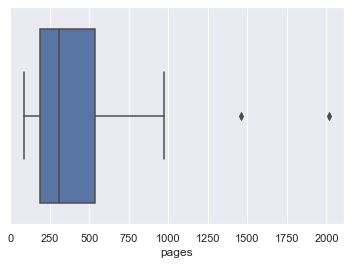

In [339]:
# Páginas
sns.boxplot(x=libros.pages)
plt.show()

Vemos que hay dos libros con muchísimas páginas. Vamos a ver con más detalle

In [340]:
libros.sort_values(by='pages', ascending=False).head(5)

,title,name,surname,publisher,first_published,genre,pages,languaje,read,score
46,Luces de Bohemia,Ramón,del Valle-Inclán,Austral,1924,play,2015,spanish,True,6.0
14,Episodios nacionales (Primera Parte). La Guerr...,Benito,Pérez Galdós,Destino,1873,novel,1457,spanish,False,NaN
86,Ulises,James,Joyce,Debolsillo,1922,novel,975,spanish,False,NaN
64,Postwar. A history of Europe since 1945,Tony,Judt,Vintage,2006,history,926,english,True,9.0
3,Una historia de amor y oscuridad,Amos,Oz,Debolsillo,2002,biography,775,spanish,True,9.0


Vaya... Parece que la obra más extensa de mi biblioteca es [Luces de Bohemia](https://es.wikipedia.org/wiki/Luces_de_bohemia), de Ramón Valle-Inclán. Esta obra de teatro apenas, culmen del esperpento, apenas sobrepasa las 200 páginas, en concreto, 215 páginas

<center><img src='https://upload.wikimedia.org/wikipedia/commons/9/99/Luces_de_bohemia%2C_esperpento_1924.jpg' width="300"></center>




In [341]:
libros.at[46, 'pages'] = 215

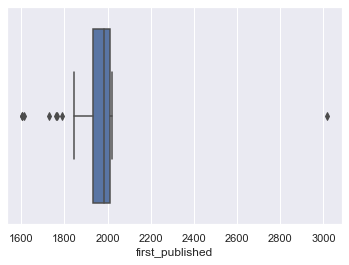

In [342]:
# Fecha de publicación
sns.boxplot(x=libros.first_published)
plt.show()

Vale, aquí hay algo muy rato. Hay un libro que se ha publicado por primera vez en 3000 algo. Se trata del libro [Weapons of Math destruction](https://es.wikipedia.org/wiki/Armas_de_destrucci%C3%B3n_matem%C3%A1tica), publicado por la americana Cathy O'Neil. El libro fue publicado en 2016, no en 3016.

In [343]:
libros[libros.first_published == libros.first_published.max()]

,title,name,surname,publisher,first_published,genre,pages,languaje,read,score
49,Weapons of math destruction,Cathy,O'Neil,Boadway Books,3016,Boadway Books,275,english,True,7.0


<center><img src='https://m.media-amazon.com/images/I/51V3piRZY4L.jpg' width="300"></center>



In [344]:
libros.at[49, 'first_published'] = 2016

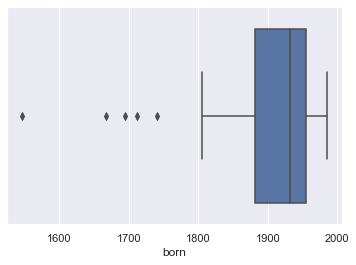

In [345]:
sns.boxplot(x=autores.born)
plt.show()

## 4. Análisis exploratorio

### 4.1 Un sesgo imperdonable

Esta fue una de las primeras conclusiones a las que llegué cuando terminé el registro. La inmensa mayoría de mis libros están escritors por hombres. 

In [346]:
autores.sex.value_counts()

M    69
F    10
Name: sex, dtype: int64

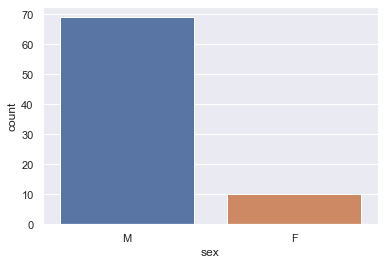

In [347]:
sns.countplot(x="sex", data=autores)
plt.show()

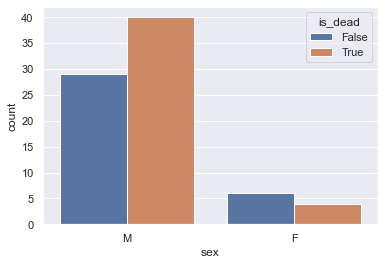

In [348]:
sns.countplot(x="sex", hue='is_dead', data=autores)
plt.show()

In [349]:
autoras= autores[autores.sex=='F']

¿Cuáles son los libros escritos por mujeres? Para saberlo, necesitamos hacer un JOIN.

In [350]:
autoras.merge(libros, on='surname',how='inner')

,name_x,surname,sex,country,region,born,died,is_dead,title,name_y,publisher,first_published,genre,pages,languaje,read,score
0,Josefina,Carabias,F,Spain,Europe,1908,1980,True,Azaña. Los que le llambamos don manuel,Josefina,Seix Barral,1980,biography,372,spanish,False,NaN
1,Emilia,Pardo Bazán,F,Spain,Europe,1851,1921,True,La madre Naturaleza,Emilia,Ediciones Cátedra,1887,novel,405,spanish,False,NaN
2,Cristina,Morales,F,Spain,Europe,1985,<NA>,False,Lectura fácil,Cristina,Anagrama,2018,novel,420,spanish,True,9.0
3,Cathy,O'Neil,F,United States,North America,1972,<NA>,False,Weapons of math destruction,Cathy,Boadway Books,2016,Boadway Books,275,english,True,7.0
4,Virginia,Woolf,F,United Kingdom,Europe,1882,1941,True,Flush,Virginia,Penguin,1933,nouvelle,115,english,True,7.0
5,Dulce María,Cardoso,F,Portugal,Europe,1964,<NA>,False,Todo son historias de amor,Dulce María,La umbra y la solana,2014,short stories,222,spanish,False,NaN
6,Lídia,Jorge,F,Portugal,Europe,1946,<NA>,False,Estuario,Lídia,La umbra y la solana,2018,novel,253,spanish,False,NaN
7,Ana,Frank,F,Netherlands,Europe,1929,1945,True,Diario de Ana Frank,Ana,Publimexi,1947,diary,255,spanish,False,NaN
8,Alice,Munro,F,Canada,North America,1931,<NA>,False,Demasiada felicidad,Alice,Debolsillo,2009,short stories,340,spanish,True,7.0
9,Svetlana,Alexiévich,F,Belarus,Europe,1948,<NA>,False,La guerra no tiene rostro de mujer,Svetlana,Debate,2013,novel,365,spanish,True,8.0



<center><img src='https://images-na.ssl-images-amazon.com/images/I/51dHWXMU2NL._SX320_BO1,204,203,200_.jpg' width="300"></center>



<center><img src='https://www.anagrama-ed.es/uploads/media/portadas/0001/22/2e9ac80d43adb20cb6615409d8ed376c42a11158.jpeg' width="300"></center>




<center><img src='https://librotea.elpais.com/wp-content/uploads/2019/05/22/09/19/1a578f1dc54c1fa79f8dd4340c497874-300x0-c-default.jpg' width="300"></center>


### 4.2 ¿Predilección por libros gruesos?


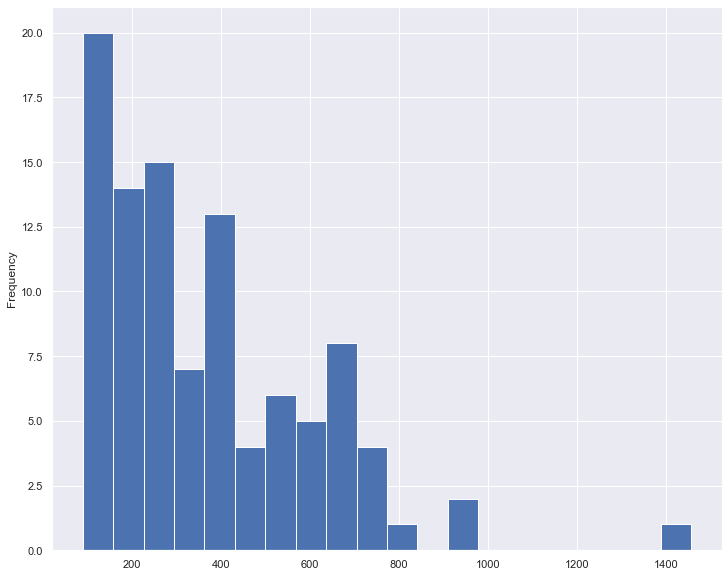

In [351]:
ax = libros["pages"].plot(kind="hist", bins=20, figsize=(12,10))


In [352]:
libros.corr()

,first_published,pages,read,score
first_published,1.000000,-0.033769,0.255630,-0.035896
pages,-0.033769,1.000000,-0.210322,0.435065
read,0.255630,-0.210322,1.000000,NaN
score,-0.035896,0.435065,NaN,1.000000


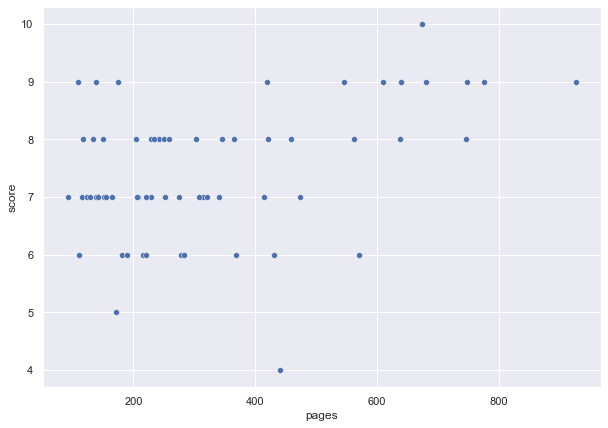

In [353]:
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x="pages", y="score", data=libros)
plt.show()

### 4.3. ¿Cuál es mi editorial favorita?

In [354]:
libros.publisher.value_counts()

Anagrama                           10
Debolsillo                          9
Ediciones Cátedra                   8
Alianza Editorial                   7
Alfaguara                           7
El País                             6
Tusquets                            5
Seix Barral                         5
Literatura Random House             4
Penguin                             4
Austral                             2
Debate                              2
Editora Regional de Extremadura     2
La umbra y la solana                2
Planeta                             2
Vintage                             2
Sexto Piso                          1
Destino                             1
Libros en Acción                    1
SM                                  1
Boadway Books                       1
Civitas                             1
Libros del Asteroide                1
Picador                             1
Faber                               1
Publimexi                           1
Edhasa      

In [355]:
libros.groupby(['publisher'])['score'].mean()

publisher
Acantilado                         9.000000
Akal                                    NaN
Alfaguara                          9.000000
Alianza Editorial                  7.800000
Anagrama                           7.777778
Anaya                              8.000000
Austral                            7.500000
Boadway Books                      7.000000
Bruguera                           8.000000
Civitas                            7.000000
Debate                             8.000000
Debolsillo                         7.428571
Destino                                 NaN
EDAF                               7.000000
Edhasa                             7.000000
Ediciones Cátedra                  6.750000
Editora Regional de Extremadura    7.000000
El Mundo                                NaN
El País                            6.500000
Faber                              8.000000
Fontana                            8.000000
J'ai lu                            7.000000
Jarramplas            

## 4.4. Formas de ordenar una biblioteca

En la fascinante autobiografía de Amos Oz en su libro "Una historia de amor y oscuridad", hay un pasaje hermoso en el que un Amos Oz de apenas diez años desquicia a su herudito padre ordenando los libros de su casa en base a las reglas más disparatadas que se le pueden ocurrir a un niño, como el número de páginas o el tipo de libro.

Esta sección es un homenaje a este escritor que tanto me cautivó en su día.


<center><img src='https://images-na.ssl-images-amazon.com/images/I/81E3yQR2zAL.jpg' width="300"></center>




In [356]:
libros.sort_values(by='title', ascending=True)

,title,name,surname,publisher,first_published,genre,pages,languaje,read,score
10,1Q84,Haruki,Murakami,Tusquets,2011,short stories,737,spanish,False,NaN
20,Así empieza lo malo,Javier,Marías,Alfaguara,2014,novel,533,spanish,False,NaN
4,Azaña. Los que le llambamos don manuel,Josefina,Carabias,Seix Barral,1980,biography,372,spanish,False,NaN
65,Años de vrtigo. Cultura y cambio en Occidente....,Philipp,Blom,Anagrama,2008,history,680,spanish,True,9.0
12,"Borges, big data y yo",Walter,Sosa Escudero,Siglo Veintiuno editores,2020,research,171,spanish,True,5.0
...,...,...,...,...,...,...,...,...,...,...
67,Una tierra prometida,Barack,Obama,Debate,2020,biography,90,spanish,False,NaN
62,Veinte poemas de amor y una cancin desesperada...,Pablo,Neruda,El País,1924,poetry,160,spanish,False,NaN
15,Ventajas de viajar en tren,Antonio,Orejudo,Tusquets,2011,novel,152,spanish,True,7.0
49,Weapons of math destruction,Cathy,O'Neil,Boadway Books,2016,Boadway Books,275,english,True,7.0


In [357]:
libros.sort_values(by='pages', ascending=False)

,title,name,surname,publisher,first_published,genre,pages,languaje,read,score
14,Episodios nacionales (Primera Parte). La Guerr...,Benito,Pérez Galdós,Destino,1873,novel,1457,spanish,False,NaN
86,Ulises,James,Joyce,Debolsillo,1922,novel,975,spanish,False,NaN
64,Postwar. A history of Europe since 1945,Tony,Judt,Vintage,2006,history,926,english,True,9.0
3,Una historia de amor y oscuridad,Amos,Oz,Debolsillo,2002,biography,775,spanish,True,9.0
0,El hombre que amaba a los perros,Leonardo,Padura,Tusquets,2009,novel,765,spanish,False,NaN
...,...,...,...,...,...,...,...,...,...,...
71,Flush,Virginia,Woolf,Penguin,1933,nouvelle,115,english,True,7.0
59,Yerma,Federico,García Lorca,Ediciones Cátedra,1934,play,111,spanish,True,6.0
23,Campo de amapolas blancas,Gonzalo,Hidalgo Bayal,Tusquets,2008,novel,109,spanish,True,9.0
56,La semilla en la nieve,Ángel,Campos Pánpano,Editora Regional de Extremadura,2004,poetry,93,spanish,True,7.0


In [358]:
df_united= libros.merge(autores, on=['name','surname'], how='left')

In [359]:
df_united.sort_values(by=['country','surname'], ascending=True)

,title,name,surname,publisher,first_published,genre,pages,languaje,read,score,sex,country,region,born,died,is_dead
45,El cerebro musical,César,Aira,Literatura Random House,2016,short stories,278,spanish,True,6.0,M,Argentina,South America,1949,<NA>,False
44,La invención de Morel,Adolfo,Bioy Casares,El País,1940,novel,155,spanish,True,7.0,M,Argentina,South America,1914,1999,True
42,Cuetos completos,Jorge Luis,Borges,Debolsillo,1995,short stories,459,spanish,True,8.0,M,Argentina,South America,1899,1886,True
2,Rayuela,Julio,Cortázar,Ediciones Cátedra,1963,novel,746,spanish,True,8.0,M,Argentina,South America,1914,1984,True
38,Todos los fuegos el fuego,Julio,Cortázar,Alfaguara,1966,short stories,204,spanish,True,8.0,M,Argentina,South America,1914,1984,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Una tierra prometida,Barack,Obama,Debate,2020,biography,90,spanish,False,NaN,M,United States,North America,1961,<NA>,False
8,Cuentos (Primera Parte),Edgar Allan,Poe,Alianza Editorial,1970,short stories,637,spanish,True,8.0,M,United States,North America,1809,1849,True
9,Cuentos (Segunda Parte),Edgar Allan,Poe,Alianza Editorial,1970,short stories,637,spanish,True,8.0,M,United States,North America,1809,1849,True
55,Client Earth,James,Thornton,Scribe,2017,biography,314,english,True,7.0,M,United States,North America,1954,<NA>,False


In [360]:
df_united[df_united.country.isnull()]

,title,name,surname,publisher,first_published,genre,pages,languaje,read,score,sex,country,region,born,died,is_dead
48,Constitución Española,NaN,NaN,Civitas,1978,legislation,141,spanish,True,7.0,NaN,NaN,NaN,<NA>,<NA>,NaN


## 4.5. Sobre nacionalidades y regiones y sesgos

In [361]:
autores.country.value_counts()

Spain             22
United States      8
Argentina          7
United Kingdom     7
Portugal           5
France             5
Chile              3
Germany            3
Austria            2
Japan              2
Ireland            2
Cuba               2
Israel             1
Mexico             1
Netherlands        1
Peru               1
Czechia            1
Colombia           1
Russia             1
Belarus            1
Canada             1
Switzerland        1
Germnay            1
Name: country, dtype: int64

In [364]:
autores.region.value_counts()

Europe           53
South America    15
North America     8
Asia              2
Middle East       1
Name: region, dtype: int64

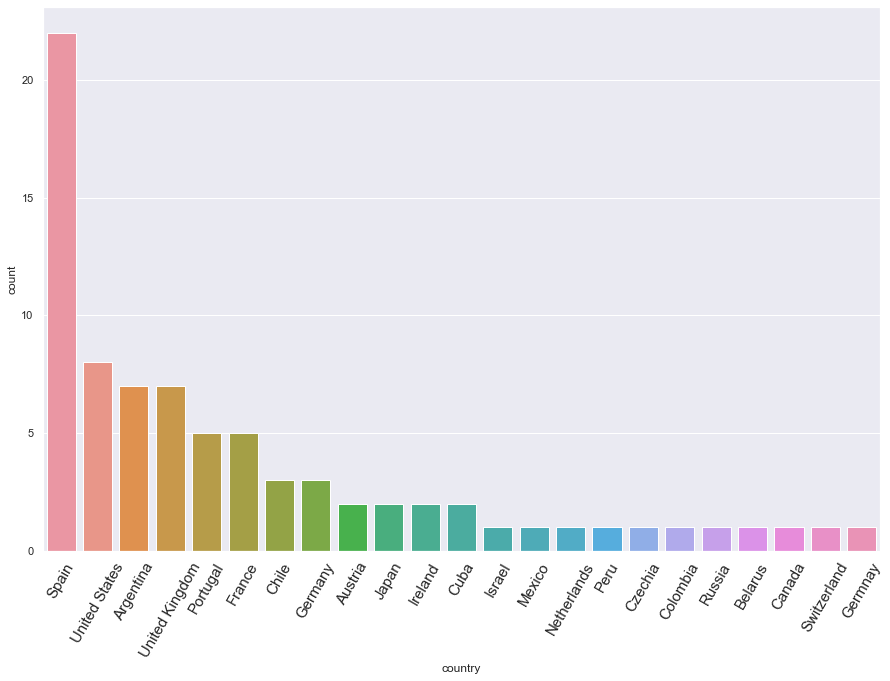

In [370]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='country',data=autores, order = autores['country'].value_counts().index)
plt.xticks(rotation=60, fontsize=15)
plt.show()

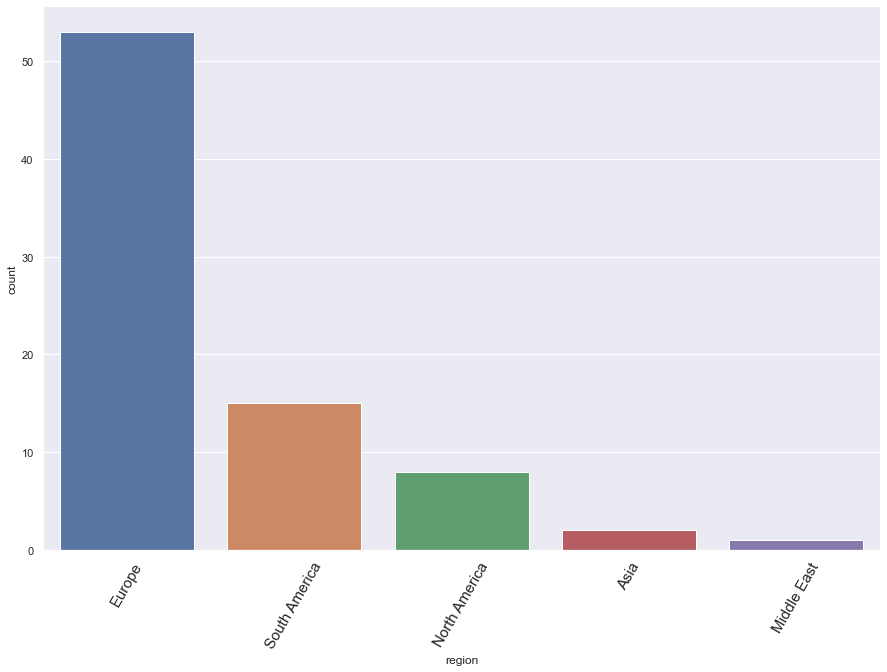

In [369]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='region',data=autores, order = autores['region'].value_counts().index)
plt.xticks(rotation=60, fontsize=15)
plt.show()

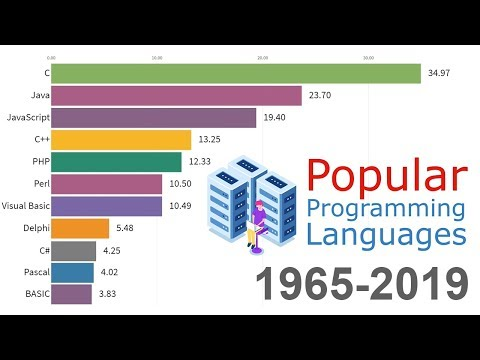

In [371]:
from IPython.display import YouTubeVideo
YouTubeVideo('Og847HVwRSI')

## 4.5. ¿Cuál es mi libro favorito?

Difícil elección porque hay muchísimos libros que me han marcado, incluído algunos que no están en mi estantería, como Cien Años de Soledad. Pero voy a mojarme y voy a decir este: El rodaballo, del escritor alemán Günter Grass. 

In [569]:
libros[libros.score == libros.score.max()]

,title,name,surname,publisher,first_published,genre,pages,languaje,read,score
30,El tambor de hijalata,Günter,Grass,Alfaguara,1949,novel,673,spanish,True,10.0


<center><img src='https://static.wikia.nocookie.net/biblioteca-virtual-de-literatura/images/b/be/G%C3%BCnter_Grass.jpg/revision/latest?cb=20170302012951&path-prefix=es' width="300"></center>



<center><img src='https://images-na.ssl-images-amazon.com/images/I/51rH0TacRBL._SX327_BO1,204,203,200_.jpg' width="500"></center>




conda install -c conda-forge wikipedia
conda install -c conda-forge stop-words
conda install -c conda-forge wordcloud


In [499]:
import wikipedia
import re
from stop_words import get_stop_words

In [500]:
stop_words = get_stop_words('es')

In [570]:
stop_words[0:20]

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella']

In [504]:
#wikipedia.languages()

In [505]:
wikipedia.set_lang("es")  

In [572]:
print(wikipedia.search("El tambor de hojalata"))

['El tambor de hojalata', 'El tambor de hojalata (película)', 'El tambor de hojalata (novela)', 'David Bennent', 'Volker Schlöndorff', 'El noveno día', 'Festival Internacional de Cine de Cannes de 1979', 'Línea 56 (Avanza Zaragoza)', 'El rodaballo', 'Jean-Claude Carrière']


In [575]:
wiki = wikipedia.page('El tambor de hojalata (novela)')

In [576]:
text = wiki.content

In [577]:
text

'El tambor de hojalata (en alemán: Die Blechtrommel) es una novela escrita por el premio Nobel alemán Günter Grass, publicada en 1959. Sus páginas relatan la vida de Oscar Matzerath, un niño que vive durante la época de la Segunda Guerra Mundial (1939 - 1945), en una narración con tintes macabros e infantiles. El libro narra los momentos decisivos en la vida de Oscar, que lo llevarán, a los 29 años de edad, a ser internado en un sanatorio psiquiátrico.\n\n\n== El narrador ==\nEl narrador de la novela es el excéntrico Oscar Matzerath. Nació en 1924 en la ciudad de Danzig, momento en el cual su mente ya estaba completamente desarrollada. Posteriormente su crecimiento se detiene al cumplir los tres años, razón por la que su apariencia, desde la perspectiva de los adultos, es la de un niño pequeño. Gracias a su tambor de hojalata también puede conocer eventos en los que él no estuvo directamente involucrado; ejemplo de ello es su explicación de cómo su madre fue concebida en un campo de pa

In [578]:
text = re.sub(r'==.*?==+', '', text) # eliminamos los headers
text = text.replace('\n', '') # eliminamos los saltos de línea

In [585]:
# Creamos una función para generar el gráfico
def plot_cloud(wordcloud):
    # fijamos el tamaño
    plt.figure(figsize=(40, 30))
    # plot de la imagen
    plt.imshow(wordcloud) 
    # sin ejes
    plt.axis("off");

In [586]:
# Importamos el paquete para hacer la nube de palabras
from wordcloud import WordCloud

In [587]:
#Genaramos la nube
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, max_words=50,
                      background_color='salmon',colormap='Pastel1', 
                      collocations=False, stopwords = stop_words).generate(text)

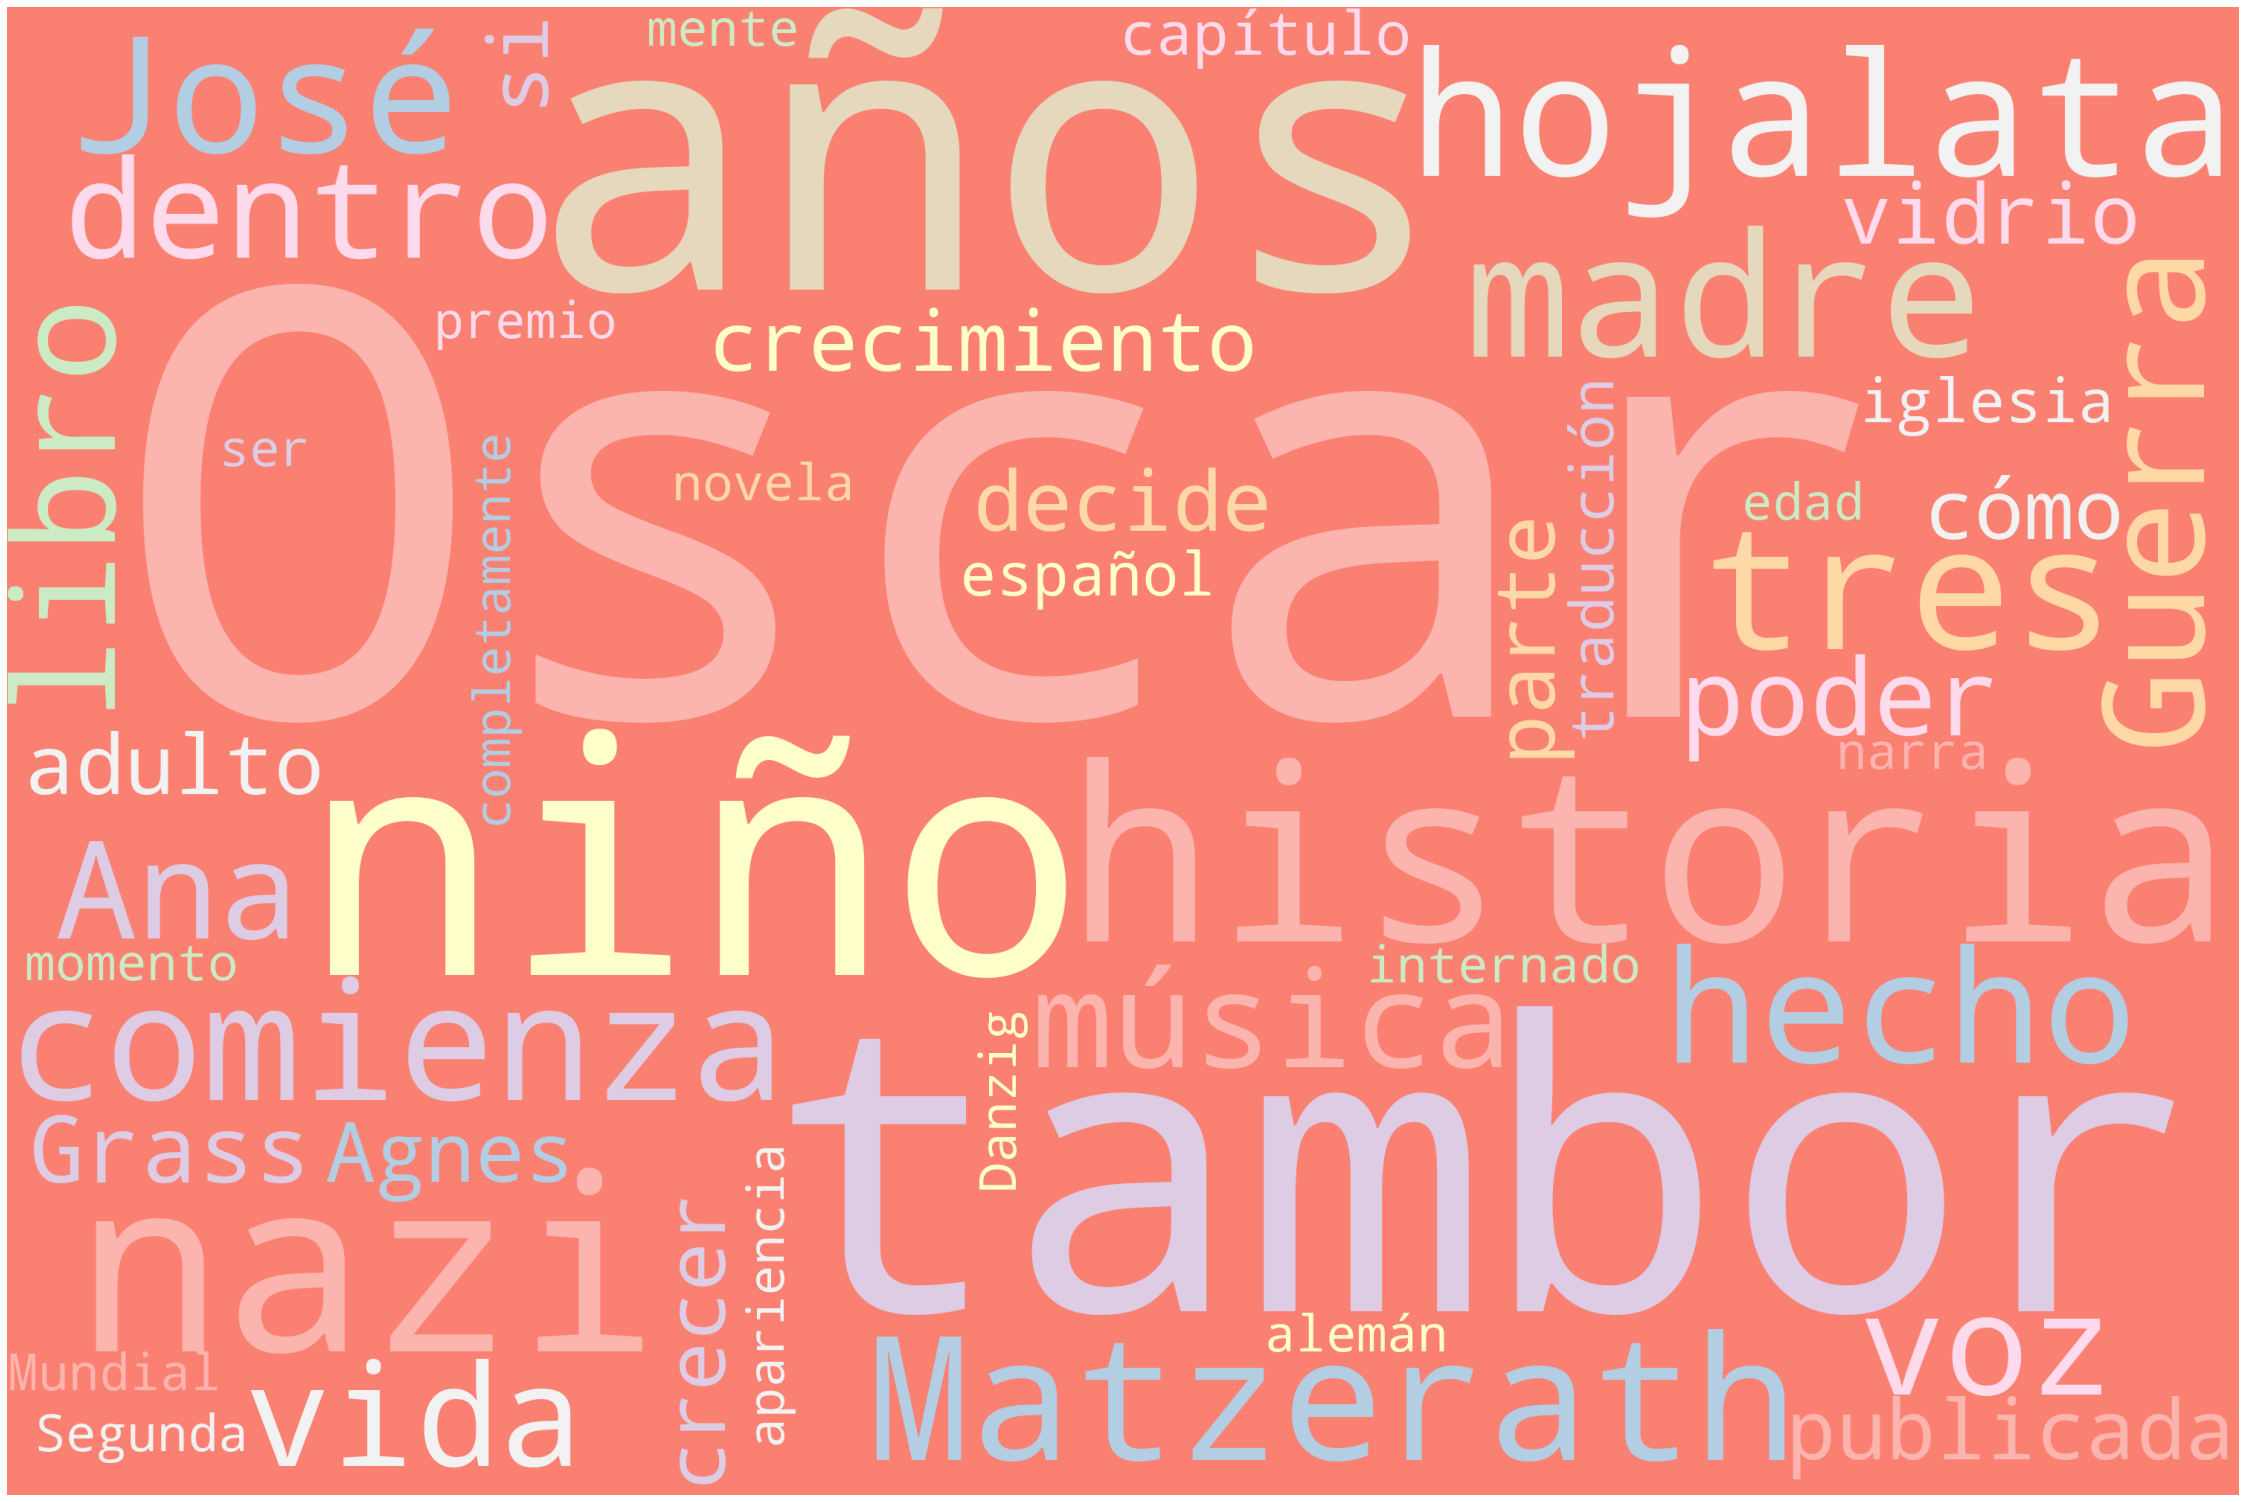

In [588]:
plot_cloud(wordcloud)